# 1. - Perkenalan

Nama        : Yuzal Qushoyyi Wahyudi\
Batch       : RMT-033\
Data        : [Data Project](https://archive.ics.uci.edu/dataset/2/adult)\
Objektif    : Pada Project kali ini akan dilakukan klasifikasi terhadap data Adult Census yang dimana pada target ini ialah kolom `income`. Pada project kali ini kita menggunakan 5 model dan model yang digunakan sebagai berikut `KNN`, `SVM`, `DecisionTree`, `RandomForest`, `XGBoost` dengan metrics yang digunakan ialah f1-score untuk dapat melihat kesimbangan data. Lalu 1 model yang terbaik akan dilakukan hyperparameter tuning agar mendapatkan hasil yang lebih baik. Kemudian dilakukan deployment agar dapat digunakan.

# 2. - Import Modul

> Pada tahap ini dilakukan import model yang akan digunakan pada projek ini.

In [377]:
# Untuk dasar
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import kendalltau
from ucimlrepo import fetch_ucirepo

# Untuk Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

# Untuk Algoritma
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder, FunctionTransformer, LabelEncoder
from sklearn.metrics import classification_report, r2_score, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay

# Untuk Pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Untuk Saving Model
import joblib

# 3. - Data Loading

> Pada tahap ini dilakukan load dataset.

In [2]:
# fetch dataset
adult = fetch_ucirepo(id=2) 

In [3]:
# Mengambil datasets yang original untuk projek
df_fetch = adult.data.original
df_fetch

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [6]:
# Save data untuk mempermudah
df_fetch.to_csv("adult.csv", index=False)

> Load data Original.

In [93]:
# Load data original
df_ori = pd.read_csv("adult.csv")

# Duplicate data original
df = df_ori.copy()

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [94]:
# Check informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Temuan:
- Pada dateset ini diketahui bahwa jumlah baris sebanyak `48842` baris dengan kolom sebanyak `15` kolom.

In [4]:
# Check Deskripsi Data
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [96]:
# Check Missing Value
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

Temuan:
- Terdapat missing value pada kolom `workclass` sebanyak 963 data, `occupation` sebanyak 966 data dan `native-country` sebanyak 274 data. Selanjutnya akan dicheck lebih lanjut terhadap missing value tersebut.

## 3.1. - Merubah data pada Income

> Pada tahap ini akan dilakukan perubahan variabel pada kolom Income, karena data nya terdapat titik pada akhir kata ex.<=50k. dan <=50k

In [97]:
# Check Unique Value
df_ori['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

- Terlihat bahwa terdapat data yang sebenarnya sama namun karena ada 1 kata yaitu `.` maka dari itu harus dihilangkan, agar data sama.

In [98]:
# Merubah kolom income
df['income'] = df["income"].str.replace('.','')

## 3.2. - Informasi Data

> Berikut informasi data pada datasets projek ini.

|Variable Name|Role|Type|Demographic|Description|Units|Missing Values|
|---|---|---|---|---|---|---|
|age|Feature|Integer|Age|N/A||no|
|workclass|Feature	|Categorical	|Income|	Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.|	|	yes|
fnlwgt|Feature|Integer||||no
education|Feature|Categorical|Education Level|Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.||no
education-num|Feature|Integer|Education Level|||no
marital-status|Feature|Categorical|Other|Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.||no
occupation|Feature|Categorical|Other|Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.||yes
relationship|Feature|Categorical|Other|Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.||no
race|Feature|Categorical|Race|White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.||no
sex|Feature|Binary|Sex|Female, Male.||no
capital-gain|Feature|Integer||||no
capital-loss|Feature|Integer||||no
hours-per-week|Feature|Integer||||no
native-country|Feature|Categorical|Other|United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.||yes
income|Target|Binary|Income|>50K, <=50K.||no

# 4. - Exploratory Data Analysis

> Pada tahap ini dilakukan EDA untuk datasets ini.

## 4.1. - Target

> EDA pada Target.

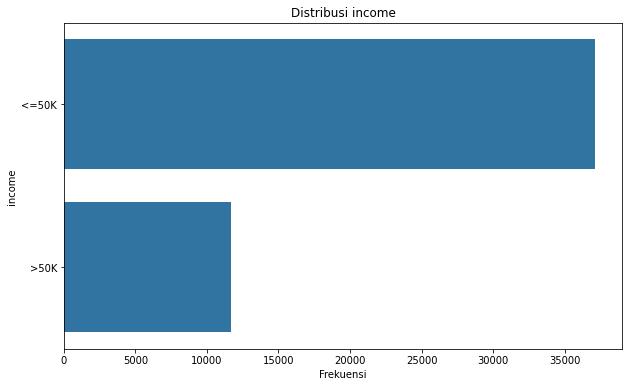

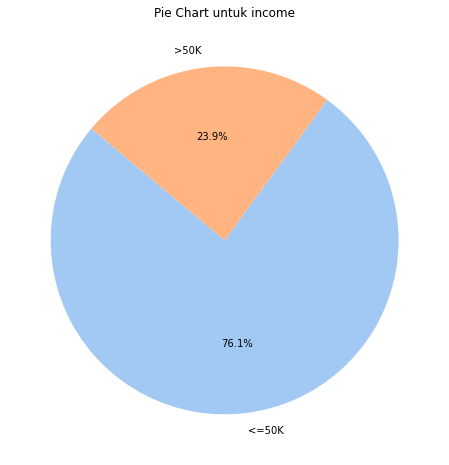

Banyaknya data: 
 income
<=50K    37155
>50K     11687
Name: count, dtype: int64

Nilai unik dari income: 2


In [8]:
# Plot Countplot untuk income
plt.figure(figsize=(10, 6))
sns.countplot(y=df['income'], order=df['income'].value_counts().index)
plt.title('Distribusi income')
plt.xlabel('Frekuensi')
plt.ylabel('income')
plt.show()

# Plot Pie chart income
income_counts = df['income'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Pie Chart untuk income')
plt.show()

# Melihat banyaknya data income
print("Banyaknya data: \n",df['income'].value_counts())

# Melihat nilai unik dari income
print("")
print("Nilai unik dari income:", df['income'].nunique())

Temuan:
- Pada data income yang `dibawah` 50k lebih banyak dibandingkan `diatas` 50k.
- data dibawah 50k sebanyak 37155 dan diatas 50k sebanyak 11687, dengan jumlah persentase `76.1%` dan `23.9%`.

## 4.2. - Numerikal

> EDA pada numerikal.

In [9]:
# Data Numerikal
numerical_cols = ['age','fnlwgt','capital-gain','capital-loss','hours-per-week']

# Inisialisasi dictionary untuk menyimpan hasil
stats = {
    'Mean': [],
    'Median': [],
    'Mode': [],
    'Variance': [],
    'Std Dev': [],
    'Skew':[],
    'Range': [],
    'Min': [],
    'Max': []
}

for col in numerical_cols:
    stats['Mean'].append(df[col].mean())
    stats['Median'].append(df[col].median())
    stats['Mode'].append(df[col].mode()[0])
    stats['Variance'].append(df[col].var())
    stats['Skew'].append(df[col].skew())
    stats['Std Dev'].append(df[col].std())
    stats['Range'].append(df[col].max() - df[col].min())
    stats['Min'].append(df[col].min())
    stats['Max'].append(df[col].max())

# Konversi dictionary ke DataFrame
stats_df = pd.DataFrame(stats, index=numerical_cols)

# Menampilkan hasil
stats_df

,Mean,Median,Mode,Variance,Std Dev,Skew,Range,Min,Max
age,38.643585,37.0,36,1.879781e+02,13.710510,0.557580,73,17,90
fnlwgt,189664.134597,178144.5,203488,1.115221e+10,105604.025423,1.438892,1478115,12285,1490400
capital-gain,1079.067626,0.0,0,5.553259e+07,7452.019058,11.894659,99999,0,99999
capital-loss,87.502314,0.0,0,1.624127e+05,403.004552,4.569809,4356,0,4356
hours-per-week,40.422382,40.0,40,1.535479e+02,12.391444,0.238750,98,1,99


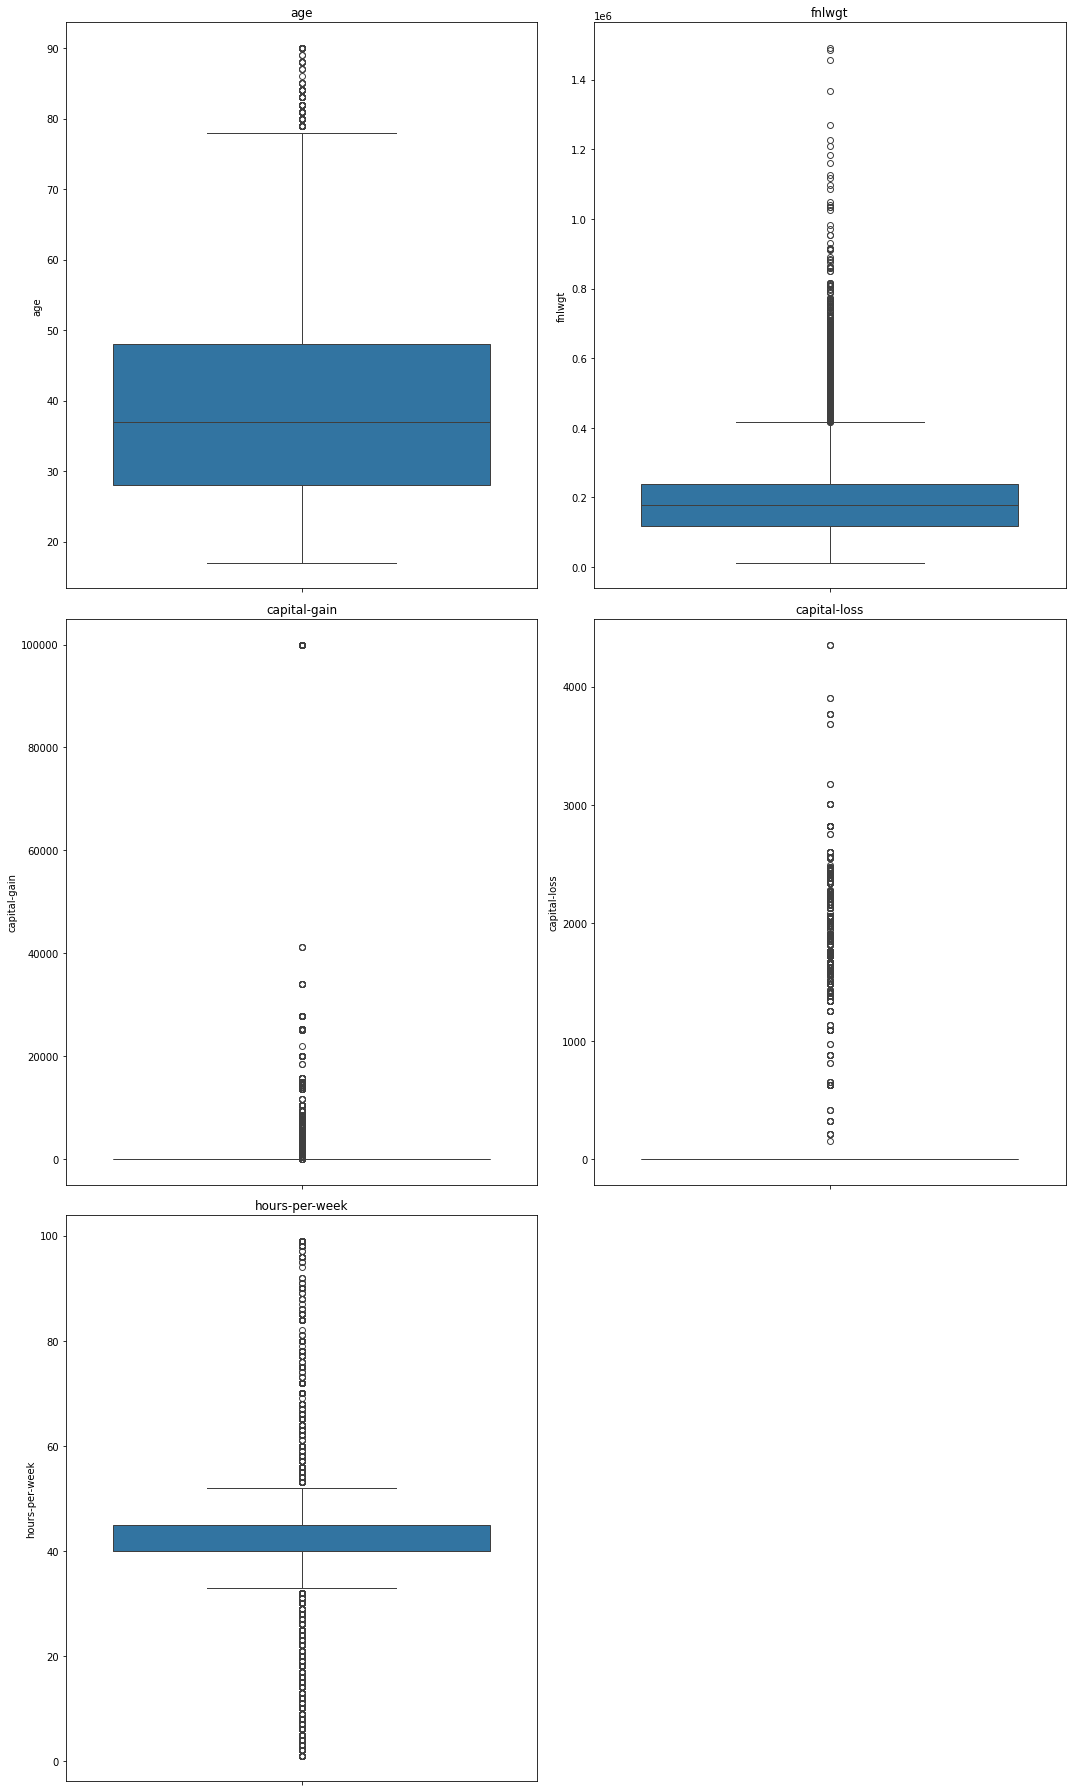

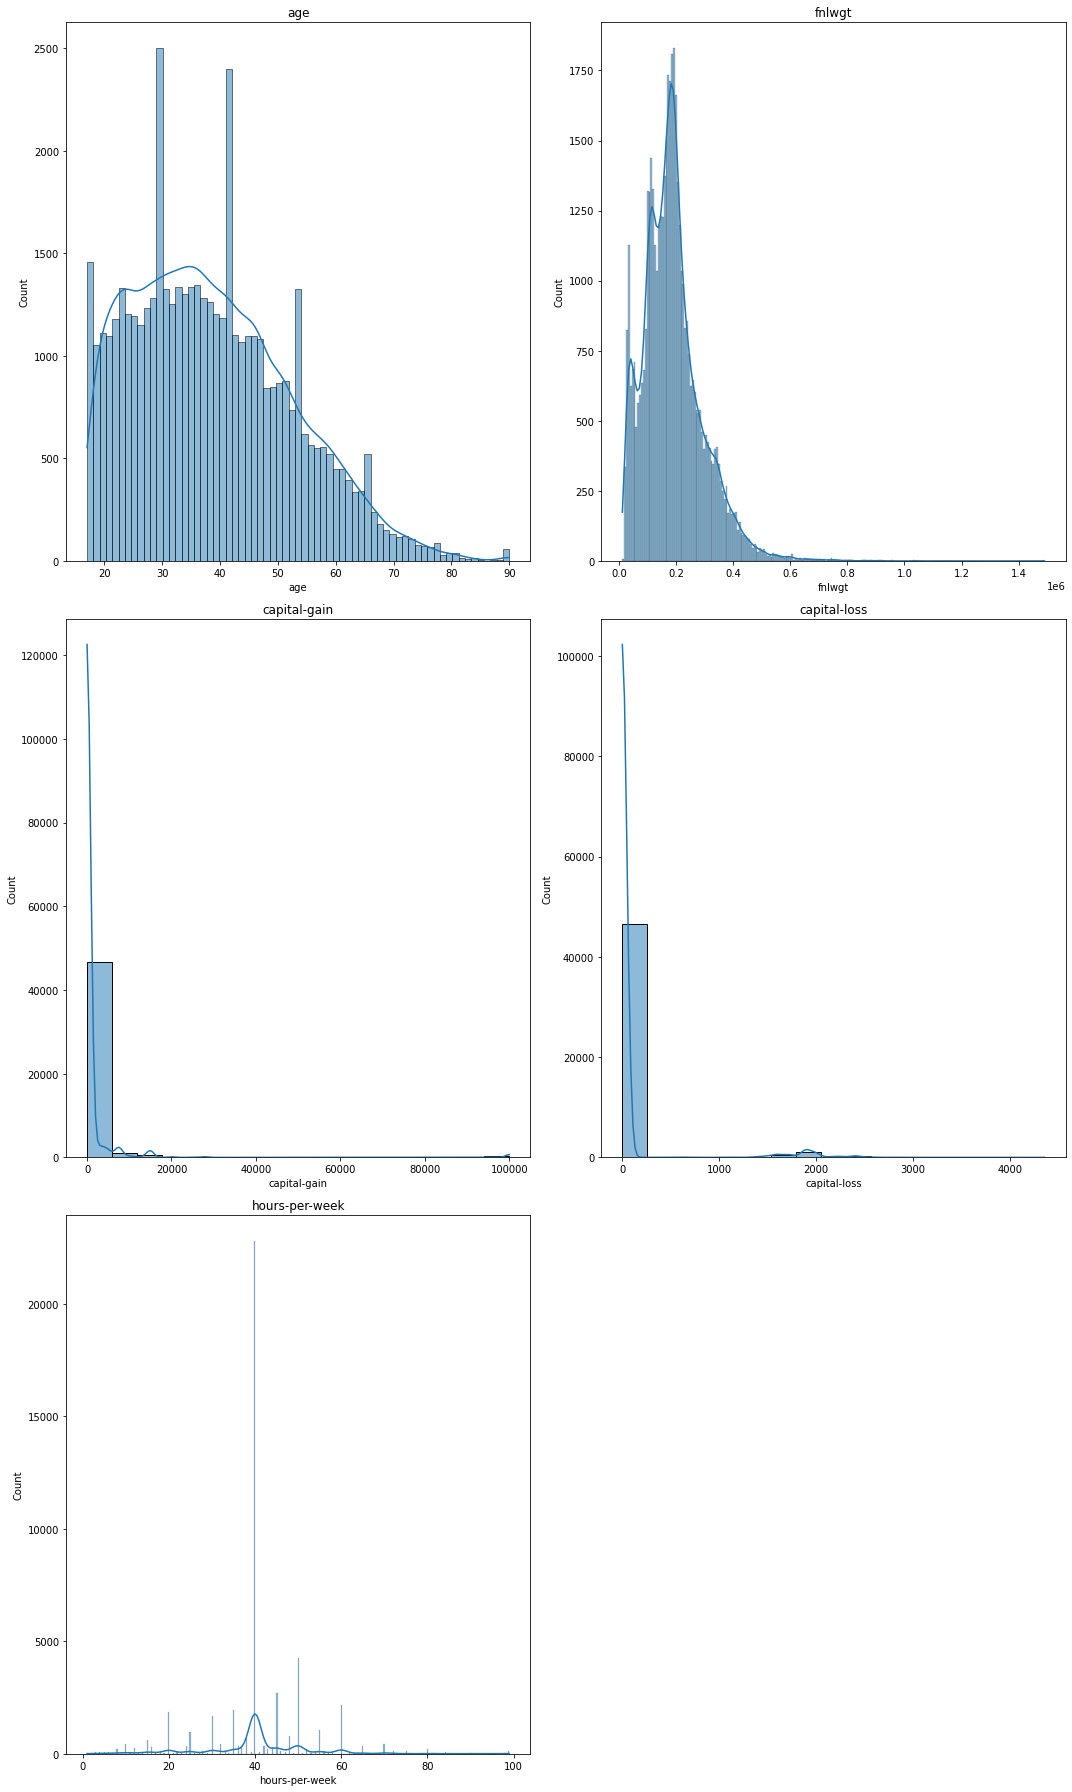

In [10]:
# Set up figure
plt.figure(figsize=(15, 25))

# Loop Boxplot terhadap numerical kolom
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)

# Layout
plt.tight_layout()
plt.show()

# Set Up figure
plt.figure(figsize=(15, 25))

# Loop Histogram terhadap numerical kolom
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)

# Layout
plt.tight_layout()
plt.show()

Temuan:
- Pada kolom numerikal ini semua data memiliki distribusi tidak normal terkecuali kolom `hours-per-week` dan untuk kolom yang memiliki distribusi skew, semua nilai skew dari data tersebut bernilai positif skew.
- Pada boxplot semua kolom numerikal ini mempunyai nilai extreme value terutama pada data capital-gain dan capital-loss, langkah selanjutnya akan diidentifikasi bagaimana persentase outlier ini.

## 4.3. - Kategorikal

> EDA pada kolom kategorikal.

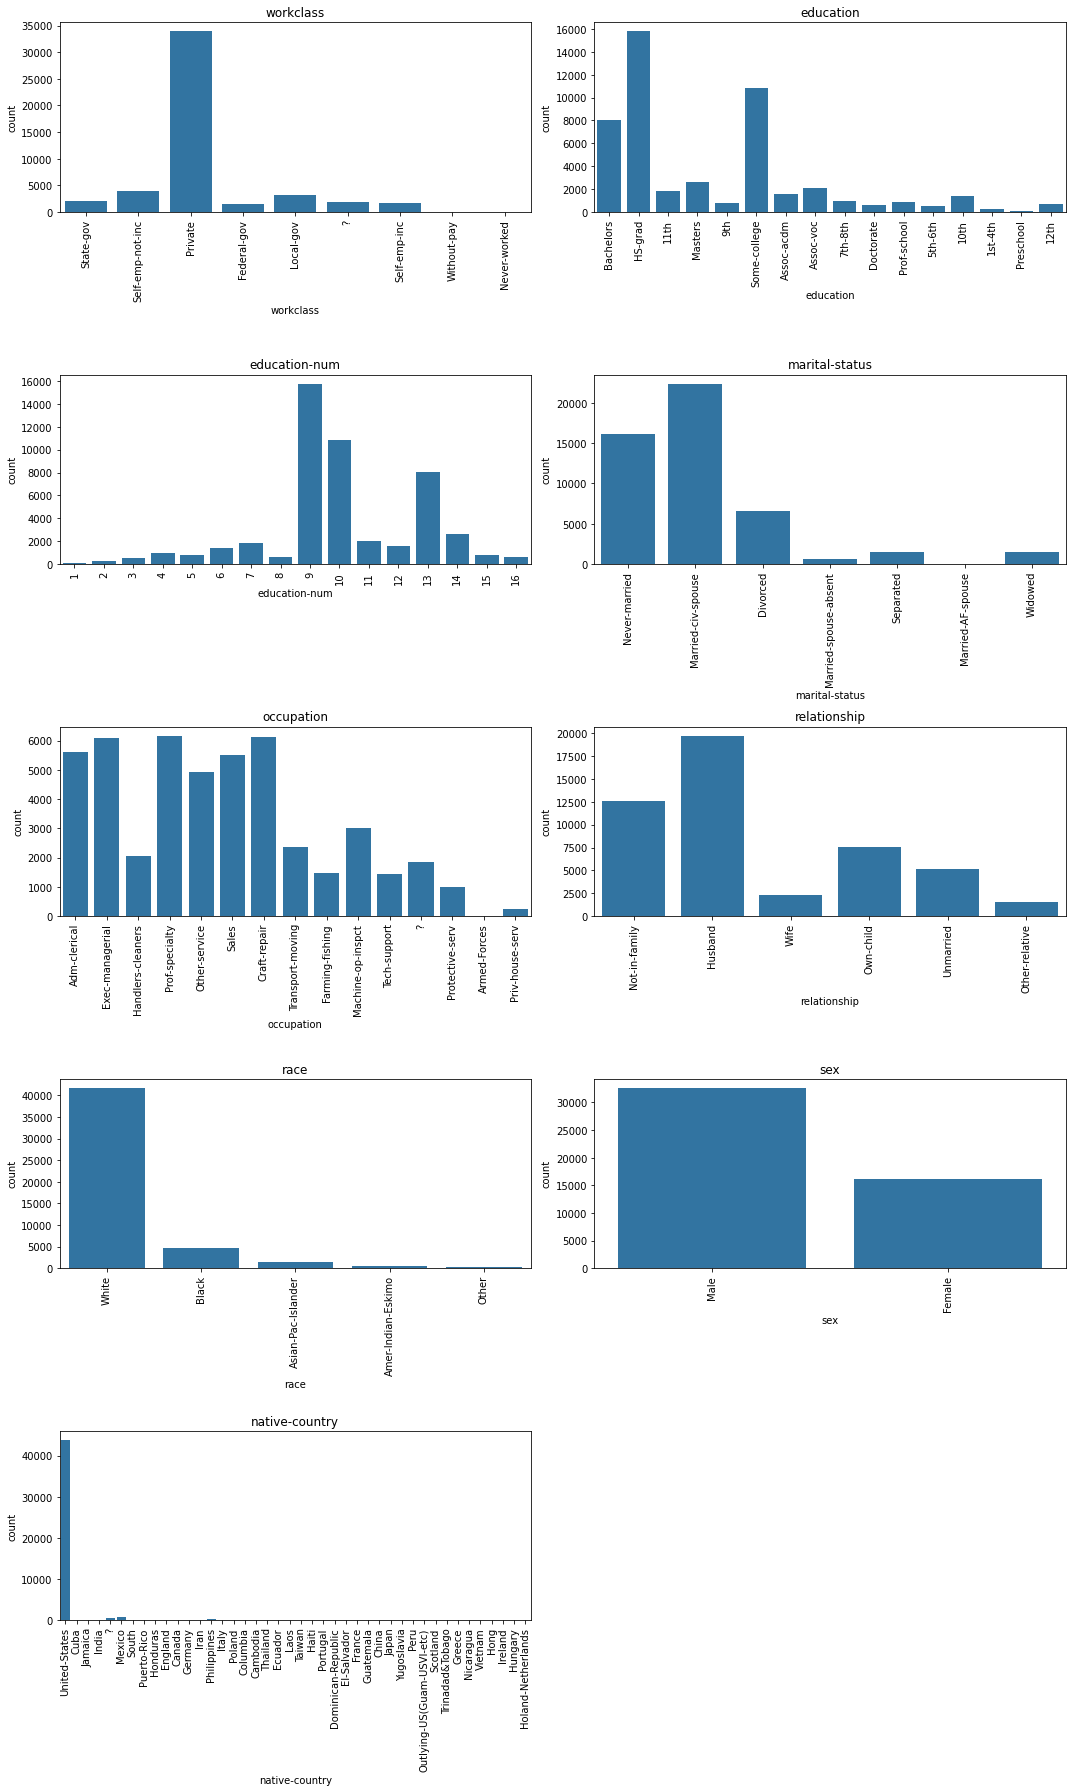

Frequency and Unique Count for workclass:
          workclass  Frequency
0           Private      33906
1  Self-emp-not-inc       3862
2         Local-gov       3136
3         State-gov       1981
4                 ?       1836
5      Self-emp-inc       1695
6       Federal-gov       1432
7       Without-pay         21
8      Never-worked         10
Unique Values: 9


Frequency and Unique Count for education:
       education  Frequency
0        HS-grad      15784
1   Some-college      10878
2      Bachelors       8025
3        Masters       2657
4      Assoc-voc       2061
5           11th       1812
6     Assoc-acdm       1601
7           10th       1389
8        7th-8th        955
9    Prof-school        834
10           9th        756
11          12th        657
12     Doctorate        594
13       5th-6th        509
14       1st-4th        247
15     Preschool         83
Unique Values: 16


Frequency and Unique Count for education-num:
    education-num  Frequency
0               

In [11]:
# Kategorikal kolom
categorical_cols = ['workclass','education','education-num','marital-status','occupation','relationship','race','sex','native-country']

# Set up figure
plt.figure(figsize=(15, 25))

# Loop categorical columns countplot
for i, col in enumerate(categorical_cols):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df[col])
    plt.title(col)
    plt.xticks(rotation=90)

# Layout
plt.tight_layout()
plt.show()

# Menyimpan data untuk variabel
freq_unique_tables = {}

for col in categorical_cols:
    freq_table = df[col].value_counts().reset_index()
    freq_table.columns = [col, 'Frequency']
    unique_count = df[col].nunique()
    freq_unique_tables[col] = (freq_table, unique_count)

# Display frequency dam unique count tables
for col, (table, unique_count) in freq_unique_tables.items():
    print(f"Frequency and Unique Count for {col}:")
    print(table)
    print(f"Unique Values: {unique_count}")
    print("\n")

Temuan:
- Pada data kategorikal ini ternyata terdapat data anomali pada kolom `workclass`,`occupation` dan `native-country` dimana, pada data tersebut ada data tambahan dengan nilai unique `?`. Langkah selanjutnya akan dilakukan drop data karena pada data tersebut kita tidak dapat mengindentifikasi maksud dari data tersebut.

# 5. - Feature Engineering

> Pada tahap ini dilakukan feature engineering untuk pengolahan data.

## 5.1. - Feature Selection

> Pada tahap ini dilakukan pemilihan kolom untuk model.

In [390]:
# Ambil kolom untuk model
df_model = df[['age', 'workclass', 'fnlwgt', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income']]

Saya masih memilih semua kolom, karena saya ingin menghandle missing value dan juga data anomali pada kolom kategorikal, lalu akan dilakukan uji korelasi antar kolom dengan target agar dapat dipilih model mana saja yang akan dipakai pada model machine learning. Dikarenakan kolom education ada 2 saya memilih kolom education yang sudah diubah menjadi number agar mempermudah proses encoding.

## 5.2. - Handling Missing Value

> Pada tahap ini akan dilakukan handling missing value pada data.

In [391]:
# Check data yang missing value
df_model[df_model.isnull().any(axis=1)]

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32565,18,NaN,103497,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
32567,29,NaN,227026,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
32574,58,NaN,299831,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
32580,40,Private,85019,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,NaN,>50K
32583,72,NaN,132015,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48769,21,NaN,212661,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
48800,73,NaN,144872,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,Canada,<=50K
48812,81,NaN,26711,11,Married-civ-spouse,NaN,Husband,White,Male,2936,0,20,United-States,<=50K
48826,50,Local-gov,139347,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,NaN,>50K


- Diketahui bahwa kolom yang memiliki missing value adalah kolom `workclass`,`occupation`,`native-country`

In [392]:
# Melihat persentase data yang missing
df_model.isnull().mean()*100

age               0.000000
workclass         1.971664
fnlwgt            0.000000
education-num     0.000000
marital-status    0.000000
occupation        1.977806
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.560993
income            0.000000
dtype: float64

- Diketahui bahwa semua missing value pada data hanya dibawah `2%` dan juga data yang missing bersifat kategori maka dari itu data tersebut akan didrop.

In [393]:
# Drop data missing value
df_model = df_model.dropna(subset=['workclass','occupation','native-country'])

In [394]:
# Check missing value
df_model.isnull().sum()

age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

### 5.2.1. - Handling unik value pada kolom workclass, occupation dan native-country

>Pada tahap ini dilakukan handling nilai unik pada kolom tersebut dikarenakan terdapat nilai unik "?"

In [395]:
# Check Persentase data nilai unik "?"
col_unik =['workclass','occupation','native-country']
for i in col_unik:
    total_count = len(df_model)
    missing_count = df_model[df_model[i] == "?"].shape[0]
    percentage = (missing_count / total_count) * 100
    print(f'Persentase nilai "?" pada kolom {i}: {percentage:.2f}%')

Persentase nilai "?" pada kolom workclass: 3.86%
Persentase nilai "?" pada kolom occupation: 3.87%
Persentase nilai "?" pada kolom native-country: 1.22%


> Berikut persentase nilai unik "?" pada setiap kolom

- Setelah dilakukan analisa lebih dalam, diketahui bahwa nilai unik "?" di kolom workclass pada nilai unik "Never-worked" saling berhubungan, jika dilakukan drop maka data tersebut akan hilang oleh karena itu saya akan menambahkan nilai unik baru hanya untuk "Never-worked" pada occupation yaitu "Does-not-work". Agar tidak menghilangkan informasi mengenai nilai unik "Never-worked"

In [396]:
# Check data pada kolom workclass
df_model[df_model['workclass']=="Never-worked"]

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
5361,18,Never-worked,206359,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K


In [397]:
# Mengganti nilai occupation "?" menjadi "Tidak Bekerja" untuk workclass "Never-worked"
df_model.loc[(df_model['workclass'] == 'Never-worked') & (df_model['occupation'] == '?'), 'occupation'] = 'Does-not-work'

In [398]:
# Check data pada kolom workclass unique value "Never-worked"
df_model[df_model['workclass']=="Never-worked"]

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
5361,18,Never-worked,206359,6,Never-married,Does-not-work,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,4,Divorced,Does-not-work,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,6,Never-married,Does-not-work,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,7,Never-married,Does-not-work,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,10,Never-married,Does-not-work,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,9,Married-civ-spouse,Does-not-work,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,10,Never-married,Does-not-work,Own-child,White,Male,0,0,4,United-States,<=50K


In [399]:
# Menghapus baris dengan workclass "?" dan occupation "?" yang tidak berhubungan dengan Never-worked
df_model = df_model[~((df_model['workclass'] == '?') & (df_model['occupation'] == '?'))]

In [400]:
# Menghapus baris dengan nilai "?" pada kolom native-country
df_model = df_model[df_model['native-country'] != '?']

In [401]:
# Check Informasi data model
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45229 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45229 non-null  int64 
 1   workclass       45229 non-null  object
 2   fnlwgt          45229 non-null  int64 
 3   education-num   45229 non-null  int64 
 4   marital-status  45229 non-null  object
 5   occupation      45229 non-null  object
 6   relationship    45229 non-null  object
 7   race            45229 non-null  object
 8   sex             45229 non-null  object
 9   capital-gain    45229 non-null  int64 
 10  capital-loss    45229 non-null  int64 
 11  hours-per-week  45229 non-null  int64 
 12  native-country  45229 non-null  object
 13  income          45229 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


- Setelah melakukan handling missing value dan juga handling nilai unik pada dataset maka total dari keseluruhan data berkurang menjadi `45229` baris.

In [402]:
# Menyimpan data untuk variabel
freq_unique_tables = {}

for col in col_unik:
    freq_table = df_model[col].value_counts().reset_index()
    freq_table.columns = [col, 'Frequency']
    unique_count = df_model[col].nunique()
    freq_unique_tables[col] = (freq_table, unique_count)

# Display frequency dam unique count tables
for col, (table, unique_count) in freq_unique_tables.items():
    print(f"Frequency and Unique Count for {col}:")
    print(table)
    print(f"Unique Values: {unique_count}")
    print("\n")

Frequency and Unique Count for workclass:
          workclass  Frequency
0           Private      33307
1  Self-emp-not-inc       3796
2         Local-gov       3100
3         State-gov       1946
4      Self-emp-inc       1646
5       Federal-gov       1406
6       Without-pay         21
7      Never-worked          7
Unique Values: 8


Frequency and Unique Count for occupation:
           occupation  Frequency
0        Craft-repair       6020
1      Prof-specialty       6008
2     Exec-managerial       5984
3        Adm-clerical       5540
4               Sales       5408
5       Other-service       4808
6   Machine-op-inspct       2970
7    Transport-moving       2316
8   Handlers-cleaners       2046
9     Farming-fishing       1480
10       Tech-support       1420
11    Protective-serv        976
12    Priv-house-serv        232
13       Armed-Forces         14
14      Does-not-work          7
Unique Values: 15


Frequency and Unique Count for native-country:
                native

>Save data baru

In [403]:
# Save Data
df_model.to_csv("new_Adult.csv",index=False)

In [404]:
df_model = pd.read_csv("new_Adult.csv")

In [405]:
df_model.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 5.2.2. - Uji Korelasi

> Pada tahap ini dilakukan uji korelasi untuk semua feature terhadap target.

Pada kolom numerikal.

In [189]:
# Membuat DataFrame kosong untuk menyimpan hasil
correlation_results = pd.DataFrame(columns=['Feature', 'tau-correlation', 'p-value', 'korelasi'])

# Menghitung korelasi Kendalltau untuk setiap kolom numerikal dengan 'default_payment_next_month'
results = []
for col in numerical_cols:
    corr_tau, pval_k = stats.kendalltau(df_model[col], df_model['income'])
    korelasi = 'Yes' if pval_k < 0.05 else 'No'
    results.append({'Feature': col, 'tau-correlation': corr_tau, 'p-value': pval_k, 'korelasi': korelasi})

correlation_results = pd.DataFrame(results)

# Mengurutkan hasil korelasi dari tinggi ke rendah berdasarkan tau-correlation
correlation_results = correlation_results.sort_values(by='tau-correlation', ascending=True)

# Menampilkan tabel hasil
correlation_results

,Feature,tau-correlation,p-value,korelasi
1,fnlwgt,-0.005264,1.703735e-01,No
3,capital-loss,0.137662,1.221097e-192,Yes
0,age,0.224707,0.000000e+00,Yes
4,hours-per-week,0.235765,0.000000e+00,Yes
2,capital-gain,0.271629,0.000000e+00,Yes


- Pada kolom numerikal ini, setelah dilakukan uji korelasi antara kolom numerikal dengan target didapatkan ada 1 kolom yang tidak memiliki korelasi dengan target yaitu `fnlwgt`.
- Maka dari itu 4 kolom lainnya akan dimasukkan kedalam model.

> Pada kolom kategorikal.

Pada tahap ini dibuat hipotesis untuk uji korelasi:

$H_0$: A variable and `income` are independent

$H_1$: A variable and `income` are dependent

In [190]:
# Kategorikal kolom
categorical_cols = ['workclass','education-num','marital-status','occupation','relationship','race','sex','native-country']

# Melakukan uji ChiSquare terhadap kolom kategorikal dengan target
for col in categorical_cols:
  cross = pd.crosstab(df_model[col],df_model['income'])
  pval = stats.chi2_contingency(cross).pvalue
  prompt = "and they are dependent" if pval<0.05 else ""
  print(f"P-value of {col} and default_payment_next_month: {pval} {prompt}")

P-value of workclass and default_payment_next_month: 5.663975256303996e-257 and they are dependent
P-value of education-num and default_payment_next_month: 0.0 and they are dependent
P-value of marital-status and default_payment_next_month: 0.0 and they are dependent
P-value of occupation and default_payment_next_month: 0.0 and they are dependent
P-value of relationship and default_payment_next_month: 0.0 and they are dependent
P-value of race and default_payment_next_month: 1.1669681373369668e-96 and they are dependent
P-value of sex and default_payment_next_month: 0.0 and they are dependent
P-value of native-country and default_payment_next_month: 5.524823074562012e-72 and they are dependent


- Pada kolom kategorikal ini telah dilakukan uji korelasi menggunakan chisquare antara kolom kategorikal dengan target diketahui semua kolom memiliki korelasi dengan target.

### 5.2.3. - Feature Selection Model

> Pada tahap ini dilakukan pemilihan kolom untuk model.

In [206]:
# Memilih kolom untuk dimasukkan kedalam model
dfModel_new =df_model[['age','capital-gain','capital-loss','hours-per-week','workclass','education-num','marital-status','occupation','relationship','race','sex','native-country','income']]
dfModel_new

,age,capital-gain,capital-loss,hours-per-week,workclass,education-num,marital-status,occupation,relationship,race,sex,native-country,income
0,39,2174,0,40,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,50,0,0,13,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,38,0,0,40,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,53,0,0,40,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,28,0,0,40,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,0,0,40,Private,13,Never-married,Prof-specialty,Own-child,White,Male,United-States,<=50K
48837,39,0,0,36,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
48839,38,0,0,50,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
48840,44,5455,0,40,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,<=50K


- Berikut kolom kolom yang dimasukkan kedalam model, dipilih karena semua kolom memiliki korelasi dengan target.

## 5.3. - Split Feature (X) and Target (y)

> Pada tahap ini dilakukan split antara feature dengan target.

In [207]:
# Split dataset

# Data Feature
X = dfModel_new.drop('income', axis=1)

# Data Target
y = dfModel_new['income']

## 5.4. - Split Train and Test set

> Spli train dan test data

In [210]:
# Melakukan split data train dengan test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=23)
X_train

,age,capital-gain,capital-loss,hours-per-week,workclass,education-num,marital-status,occupation,relationship,race,sex,native-country
21229,31,0,0,37,Private,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,United-States
28668,31,0,0,50,Private,13,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
26141,28,0,0,35,Private,9,Married-civ-spouse,Other-service,Husband,White,Male,United-States
48504,52,0,0,40,Private,4,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,United-States
40327,33,0,0,40,Self-emp-not-inc,13,Never-married,Tech-support,Own-child,White,Male,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
10498,74,0,2149,20,Self-emp-not-inc,9,Married-civ-spouse,Sales,Husband,White,Male,United-States
12100,55,0,0,40,Private,9,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
28660,22,0,0,40,Private,9,Never-married,Handlers-cleaners,Own-child,White,Male,United-States
10012,24,0,0,48,Private,9,Divorced,Sales,Unmarried,Amer-Indian-Eskimo,Female,United-States


## 5.5. - Handling Outlier

> Pada tahap ini akan dilakukan handling outlier pada dataset.

In [214]:
# Check persentase Outliers
outliers_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']

for col in outliers_cols:
    # Tukey's Rule
    q1 = dfModel_new[col].quantile(0.25)
    q3 = dfModel_new[col].quantile(0.75)
    iqr = q3 - q1

    up_bound = q3 + 1.5 * iqr
    low_bound = q1 - 1.5 * iqr

    print(f'Column: {col}')
    print(f'Upper Boundary: {up_bound}')
    print(f'Lower Boundary: {low_bound}')

    # Filter data outlier dan simpan variabel outlier
    outlier = dfModel_new[col][(dfModel_new[col] < low_bound) | (dfModel_new[col] > up_bound)]
    no_outlier = dfModel_new[col][(dfModel_new[col] >= low_bound) & (dfModel_new[col] <= up_bound)]

    print(f'Percentage of outliers for {col}: {len(outlier) * 100 / len(dfModel_new[col]):.2f}%')
    print("\n")

Column: age
Upper Boundary: 75.5
Lower Boundary: -0.5
Percentage of outliers for age: 0.59%


Column: capital-gain
Upper Boundary: 0.0
Lower Boundary: 0.0
Percentage of outliers for capital-gain: 8.38%


Column: capital-loss
Upper Boundary: 0.0
Lower Boundary: 0.0
Percentage of outliers for capital-loss: 4.73%


Column: hours-per-week
Upper Boundary: 52.5
Lower Boundary: 32.5
Percentage of outliers for hours-per-week: 26.31%




- Diketahui bahwa semua kolom memiliki outliers, namun saya tidak menghandle outliers tersebut. Menurut domain knowledge saya kolom tersebut sangat berpengaruh terhadap target.

## 5.6. - Split Categorical and Numerical

> Split data kategorik dan numerikal.

In [221]:
# Split data kategorikal dan numerikal
num_columns = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']
cat_o_columns = ['education-num']
cat_n_columns= ['workclass','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

print('Numeric Columns: ', num_columns)
print('Categorical Ordinal Columns: ', cat_o_columns)
print('Categorical Nominal Columns: ', cat_n_columns)

Numeric Columns:  ['age', 'capital-gain', 'capital-loss', 'hours-per-week']
Categorical Ordinal Columns:  ['education-num']
Categorical Nominal Columns:  ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


In [223]:
# Split numerical columns and categorical columns

X_train_num = X_train[num_columns]
X_train_cat_o = X_train[cat_o_columns]
X_train_cat_n = X_train[cat_n_columns]

X_test_num = X_test[num_columns]
X_test_cat_o = X_test[cat_o_columns]
X_test_cat_n = X_test[cat_n_columns]

X_train_num

,age,capital-gain,capital-loss,hours-per-week
21229,31,0,0,37
28668,31,0,0,50
26141,28,0,0,35
48504,52,0,0,40
40327,33,0,0,40
...,...,...,...,...
10498,74,0,2149,20
12100,55,0,0,40
28660,22,0,0,40
10012,24,0,0,48


## 5.7. - Pipeline LabelEncoding, Scalling dan Encoding

> Pembuatan Pipeline

In [298]:
# Buat instance dari LabelEncoder
label_encoder = LabelEncoder()

# Ubah nilai target menjadi bentuk numerik
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [340]:
#Buat column transformer untuk preprocessing
transformer = ColumnTransformer([
('scaler', MinMaxScaler(), num_columns),
('ordinal', OrdinalEncoder(), cat_o_columns),
('nominal', OneHotEncoder(handle_unknown='ignore'), cat_n_columns)
])

# 6. - Model Definition Pipeline

> Pada model ini kita akan menggunakan 5 model yang berbeda untuk mencari model mana yang paling terbaik dalam melakukan predict yaitu KNN, SVN, Decision Tree, Random Forest dan XGBoost.

In [341]:
#Membuat pipeline untuk KNNeighbours
pipe_knn = Pipeline([
('transformer', transformer),
('classifier', KNeighborsClassifier())
])

#Membuat pipeline untuk SVM
pipe_svm = Pipeline([
('transformer', transformer),
('classifier', SVC())
])

#Membuat pipeline untuk Decision Tree
pipe_dt = Pipeline([
('transformer', transformer),
('classifier', DecisionTreeClassifier())
])

#Membuat pipeline untuk Random Forest
pipe_rf = Pipeline([
('transformer', transformer),
('classifier', RandomForestClassifier())
])

#Membuat pipeline untuk XGBoost
pipe_xgb = Pipeline([
('transformer', transformer),
('classifier', XGBClassifier())
])

## 6.1. - KNN

> Model KNN

In [342]:
pipe_knn.fit(X_train,y_train_encoded)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['age', 'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['education-num']),
                                                 ('nominal',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('classifier', KNeighborsClassifier())])

In [343]:
# Predik data train dan test KNN
y_pred_train_knn = pipe_knn.predict(X_train)
y_pred_test_knn = pipe_knn.predict(X_test)

In [303]:
# Check the Report of model KNN
print('Report Train KNN: \n', classification_report(y_train_encoded, y_pred_train_knn))
print('Report Test KNN: \n', classification_report(y_test_encoded, y_pred_test_knn))

Report Train KNN: 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92     27209
           1       0.78      0.67      0.72      8974

    accuracy                           0.87     36183
   macro avg       0.84      0.81      0.82     36183
weighted avg       0.87      0.87      0.87     36183

Report Test KNN: 
               precision    recall  f1-score   support

           0       0.87      0.90      0.89      6812
           1       0.66      0.57      0.62      2234

    accuracy                           0.82      9046
   macro avg       0.77      0.74      0.75      9046
weighted avg       0.82      0.82      0.82      9046



## 6.2. - SVM

> Model SVM

In [350]:
# Training model SVM
pipe_svm.fit(X_train, y_train_encoded)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['age', 'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['education-num']),
                                                 ('nominal',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('classifier', SVC())])

In [351]:
# Predik data train dan test SVM
y_pred_train_svm = pipe_svm.predict(X_train)
y_pred_test_svm = pipe_svm.predict(X_test)

In [352]:
# Check the Report of model SVM
print('Report Train SVM: \n',classification_report(y_train_encoded, y_pred_train_svm))
print('Report Test SVM: \n',classification_report(y_test_encoded, y_pred_test_svm))

Report Train SVM: 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89     27209
           1       0.73      0.49      0.59      8974

    accuracy                           0.83     36183
   macro avg       0.79      0.72      0.74     36183
weighted avg       0.82      0.83      0.82     36183

Report Test SVM: 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      6812
           1       0.74      0.48      0.58      2234

    accuracy                           0.83      9046
   macro avg       0.79      0.71      0.74      9046
weighted avg       0.82      0.83      0.82      9046



## 6.3. - Decision Tree

In [354]:
# Training model Decision Tree
pipe_dt.fit(X_train, y_train_encoded)


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['age', 'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['education-num']),
                                                 ('nominal',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('classifier', DecisionTreeClassifier())])

In [355]:
# Predik data train dan test Decision Tree
y_pred_train_dt = pipe_dt.predict(X_train)
y_pred_test_dt = pipe_dt.predict(X_test)

In [356]:
# Check the Report of model Decision Tree
print('Report Train Decision Tree: \n', classification_report(y_train_encoded, y_pred_train_dt))
print('Report Test Decision Tree: \n', classification_report(y_test_encoded, y_pred_test_dt))

Report Train Decision Tree: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     27209
           1       0.98      0.91      0.94      8974

    accuracy                           0.97     36183
   macro avg       0.97      0.95      0.96     36183
weighted avg       0.97      0.97      0.97     36183

Report Test Decision Tree: 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      6812
           1       0.64      0.62      0.63      2234

    accuracy                           0.82      9046
   macro avg       0.76      0.75      0.76      9046
weighted avg       0.82      0.82      0.82      9046



## 6.4. - Random Forest

In [357]:
# Training model Random Forest
pipe_rf.fit(X_train,y_train_encoded)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['age', 'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['education-num']),
                                                 ('nominal',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('classifier', RandomForestClassifier())])

In [358]:
# Predik data train dan test Random Forest
y_pred_train_rf = pipe_rf.predict(X_train)
y_pred_test_rf = pipe_rf.predict(X_test)

In [359]:
# Check the Report of model Random Forest
print('Report Train Random Forest: \n', classification_report(y_train_encoded, y_pred_train_rf))
print('Report Test Random Forest: \n', classification_report(y_test_encoded, y_pred_test_rf))

Report Train Random Forest: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     27209
           1       0.96      0.93      0.94      8974

    accuracy                           0.97     36183
   macro avg       0.97      0.96      0.96     36183
weighted avg       0.97      0.97      0.97     36183

Report Test Random Forest: 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      6812
           1       0.71      0.62      0.66      2234

    accuracy                           0.84      9046
   macro avg       0.80      0.77      0.78      9046
weighted avg       0.84      0.84      0.84      9046



## 6.5 - Boosting XGBoost

In [360]:
# Training model XGBoost
pipe_xgb.fit(X_train,y_train_encoded)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['age', 'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['education-num']),
                                                 ('nominal',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('classifier',
                 XG...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [361]:
# Predik data train dan test XGBoost
y_pred_train_xgb = pipe_xgb.predict(X_train)
y_pred_test_xgb = pipe_xgb.predict(X_test)

In [362]:
# Check the Report of model XGBoost 
print('Report Train XGBoost: \n', classification_report(y_train_encoded, y_pred_train_xgb))
print('Report Test XGBoost: \n', classification_report(y_test_encoded, y_pred_test_xgb))

Report Train XGBoost: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93     27209
           1       0.81      0.69      0.75      8974

    accuracy                           0.88     36183
   macro avg       0.86      0.82      0.84     36183
weighted avg       0.88      0.88      0.88     36183

Report Test XGBoost: 
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      6812
           1       0.79      0.66      0.72      2234

    accuracy                           0.87      9046
   macro avg       0.84      0.80      0.82      9046
weighted avg       0.87      0.87      0.87      9046



## 6.6 - Kesimpulan

- Pada evaluasi kali ini saya melihat metrics f1-score nya dikarenakan saya ingin melihat keseimbangan data agar model dapat menebak dengan baik.
- Pada KNN\
Train Set: F1-score = 0.87 (weighted avg)\
Test Set: F1-score = 0.82 (weighted avg)

- Pada SVM\
Train Set: F1-score = 0.82 (weighted avg)\
Test Set: F1-score = 0.82 (weighted avg)

- Pada DecisionTree\
Train Set: F1-score = 0.97 (weighted avg)\
Test Set: F1-score = 0.82 (weighted avg)

- Pada RandomForest\
Train Set: F1-score = 0.97 (weighted avg)\
Test Set: F1-score = 0.84 (weighted avg)

- Pada XGBoost\
Train Set: F1-score = 0.88 (weighted avg)\
Test Set: F1-score = 0.87 (weighted avg)

- Dari data tersebut didapatkan bahwa data yang paling seimbang adalah XGBoost.

# 7. - Cross Validation

> Pada tahap ini dilakukan cross validation pada setiap base model

In [367]:
# Kumpulkan pipeline ke dalam dictionary
models = {
    'KNN': pipe_knn,
    'SVM': pipe_svm,
    'DecisionTree': pipe_dt,
    'RandomForest': pipe_rf,
    'XGBoost': pipe_xgb
}

# Definisikan stratified k-fold
skf = StratifiedKFold(n_splits=5)

# Lakukan cross-validation dengan StratifiedKFold
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train_encoded, cv=skf, scoring='f1_weighted')
    print(f'{name} Cross-Validation Scores: {cv_scores}')
    print(f'{name} Mean CV Score: {cv_scores.mean()}')
    print("\n")

KNN Cross-Validation Scores: [0.81918618 0.81912186 0.81087413 0.81510085 0.81054864]
KNN Mean CV Score: 0.8149663328740056


SVM Cross-Validation Scores: [0.81465953 0.81606345 0.82054687 0.81167539 0.81633779]
SVM Mean CV Score: 0.8158566050698262


DecisionTree Cross-Validation Scores: [0.81630473 0.82167481 0.81723508 0.81297587 0.80822986]
DecisionTree Mean CV Score: 0.8152840715548866


RandomForest Cross-Validation Scores: [0.84591745 0.84194829 0.84132376 0.84347707 0.83458533]
RandomForest Mean CV Score: 0.8414503822064369


XGBoost Cross-Validation Scores: [0.87118836 0.86336746 0.86094369 0.86530593 0.86333504]
XGBoost Mean CV Score: 0.8648280968382289




- Terlihat bahwa pada cross validation ini score yang paling tertinggi ialah model XGBoost yang dimana model ini akan dilakukan hyperparameter tuning.

# 8. - Hyperparameter Tuning XGBoost

> Pada tahap ini dilakukan Hyperparameter Tuning untuk XGBoost

In [374]:
# Definisikan parameter grid untuk XGBoost
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__subsample': [0.7, 0.8, 0.9],
}

# Lakukan GridSearchCV
grid_search = GridSearchCV(pipe_xgb, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train_encoded)

# Tampilkan hasil terbaik
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_}')

# Dapatkan model terbaik
best_xgb_model = grid_search.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 7, 'classifier__n_estimators': 300, 'classifier__subsample': 0.9}
Best cross-validation score: 0.8670890495317117


- Setelah dilakukan hyperparameter tuning score crossvalidation meningkat dari `0.8648280968382289` menjadi `0.8670890495317117` walaupun hanya meningkat 0.003 berarti bisa dikatakan data tersebut meningkat.

In [375]:
# Evaluate the best model on the test set
y_pred_best_test = best_xgb_model.predict(X_test)
f1_test = f1_score(y_test_encoded, y_pred_best_test, average='weighted')
print(f'F1-score Test Set: {f1_test}')

# Evaluate the best model on the train set
y_pred_best_train = best_xgb_model.predict(X_train)
f1_train = f1_score(y_train_encoded, y_pred_best_train, average='weighted')
print(f'F1-score Train Set: {f1_train}\n')

# Classification report test set
print('Report test set best model: \n',classification_report(y_test_encoded , y_pred_best_test))
print('Report Test XGBoost: \n',classification_report(y_test_encoded, y_pred_test_xgb))

# Classification report train set
print('Report train set best model: \n',classification_report(y_train_encoded, y_pred_best_train))
print('Report Train XGBoost: \n',classification_report(y_train_encoded, y_pred_train_xgb))

F1-score Test Set: 0.866580374834493
F1-score Train Set: 0.8807122280810437

Report test set best model: 
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      6812
           1       0.79      0.65      0.71      2234

    accuracy                           0.87      9046
   macro avg       0.84      0.80      0.82      9046
weighted avg       0.87      0.87      0.87      9046

Report Test XGBoost: 
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      6812
           1       0.79      0.66      0.72      2234

    accuracy                           0.87      9046
   macro avg       0.84      0.80      0.82      9046
weighted avg       0.87      0.87      0.87      9046

Report train set best model: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.92     27209
           1       0.82      0.69      0.75      8974

    accuracy         

- Diketahui bahwa tidak ada perubahan yang signifikan antara XGBoost sebelum dan sesudah di hyperparameter tuning. Dikarenakan nilai score crossvalidation yang hanya naik 0.003 jadi perubahan yang didapatkan tidak signifikan.

# 9. - Saving Model

> Pada tahap ini dilakukan saving model

In [378]:
# Saving model menggunakan joblib
joblib.dump(best_xgb_model,"my_model.pkl")

['my_model.pkl']

# 10. - Conceptual Problem

*Jawab pertanyaan berikut:*

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

3. Jelaskan apa yang dimaksud dengan Cross Validation !

---

1. Bagging adalah singkatan dari Bootstrap AGGregating. Nama Bagging adalah gabungan Bootstrapping dan Aggregation untuk membentuk satu model ensemble. Bagging dapat mengurangi varians, mengatasi overfitting dan meningkatkan akurasi. Cara kerja bagging ialah melakukan pengambilan sampel dengan cara penggantian, beberapa model dilatih secara independen pada setiap subset bootstrapnya dan prediksi akhirnya ialah hasil dari penggabungan prediksi dari semua model.
2. Random Forest menggunakan pendekatan bagging. Model Trees dilatih secara independen pada subset data yang berbeda dan prediksi digabungkan melalui averaging dan random forest ini mengurangi varians dengan menggabungkan prediksi dari banyak trees (model) yang berbeda. XGBoost menggunakan pendekatan boosting. Model tress dibangun secara berurutan dimana setiap model baru mencoba memperbaiki kesalahan dari model sebelumnya. XGBoost ini mengurangi bias dan varians dengan memperbaiki kesalahan prediksi dari model sebelumnya secara iteratif.
3. Cross Validation adalah teknik yang digunakan untuk mengevaluasi kinerja model prediktif pada data yang belum terlihat (UnseenData). Tujuan dari cross validation untuk memastikan bahwa model yang dibuat tidak overfit atau underfit dan mampu menggeneralisasi dengan baik pada data yang baru.

# 11. - Kesimpulan

- Pada base model diapatkan bahwa nilai f1-score yang paling baik ialah model XGBoost dan dilakukan hyperparameter tuning, didapatkan bahwa peningkatan model hanya sedikit sebesar `0.003`
- Pada model XGBoost yang sudah di hyperparameter tuning ini dalam sisi bisnis akurasi untuk menebak income `>50k` masih terbilang cukup baik sekitar 70% model ini dapat menebak nilai 1 atau `>50k`. Namun untuk menebak `<=50k` model ini cukup baik dengan persentase 90%.
- Pada f1-score yang tinggi, dalam sisi bisnis model XGBoost memberikan prediksi yang akurat terutama untuk kategori 0 atau `<=50k` sebesar 90% dan untuk data `>50k` prediksi pada kategori masih bisa ditingkatkan dan perlu dilakukan improvement agar model dapat menebak lebih baik lagi.
- Perlu dilakukan peningkatan dalam model XGBoost dan juga dilihat bagaimana class imbalance.